<a href="https://colab.research.google.com/github/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Group_Iron_Ore_Froth_Flotation_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality Prediction of Iron Ore Mining Flotation Process**

## **1. Problem Definition**

**Gangue concentrate predict in the reverse cationic flotation:**


Mined ores are mostly mixtures of extractable minerals and nonvaluable material (gangue). Mineral processing (e.g. ore dressing, ore beneficiation) follows mining and prepares the ore for extraction of the valuable metal. A principal step in mineral processing is physical separation of the particles of valuable minerals from the gangue, to produce an enriched portion (concentrate) containing most of the valuable minerals, and a discard (tailing) containing predominantly the gangue.

A separation of minerals by exploiting difference of surface properties (hydrophobicity) is called flotation. **The reverse cationic flotation** is commonly used to separate iron from silica. By adjusting the 'chemistry' of the pulp by adding various chemical reagents, iron minerals remain in the water and create sediment with a high concentration of iron (valuable minerals). At the same time, silica particles (gangue) attach to air bubbles and float to the surface.

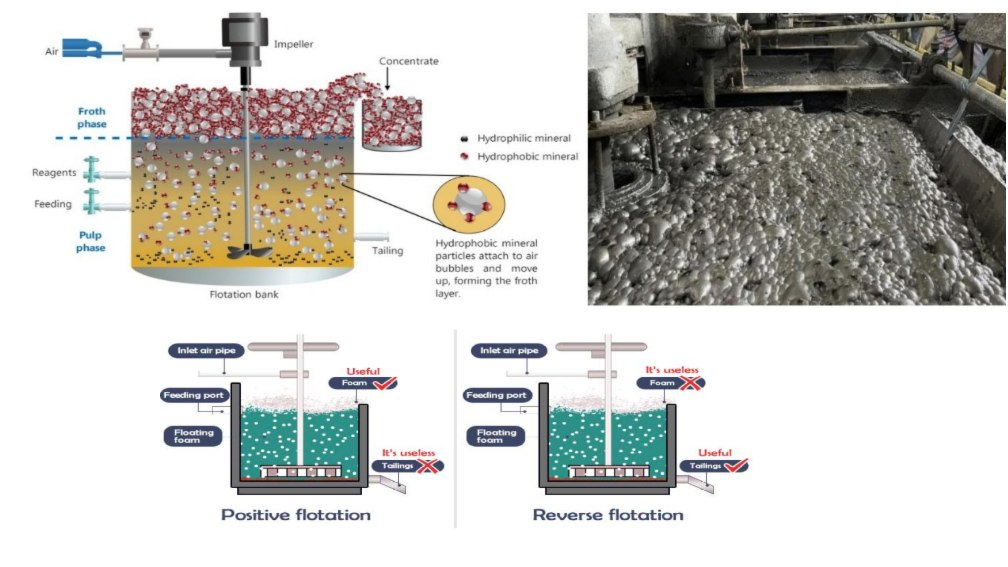

Flotation concentrate is periodically sampled to determine its purity (i.e., *%valuable*, *%gangue*). Higher *%gangue* in the concentrate is undesirable as it indicates that most valuable minerals had gone into the tailing. Purity measurement is usually done in a lab and can take some time before process engineers can make any adjustments based on the results. A timely investigation of concentrate purity is, therefore, a fundamental aspect for the control and optimization of the flotation process.

This project explores the application of machine learning to predict gangue (silica) in the flotation concentrate. The prediction will help process engineers assess purity of flotation concentrate and take corrective actions in advance. More specifically, the goal is  the percentage of silica in the iron ore concentrate.

Source of dataset: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

##**2. Data Understanding**

###**2.1. Data Definitions**

- **Date**: Data collection time.
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

### **2.2. Inspection of the data**

- The first column shows time and date range (march 2017 -  september 2017). 
- Some columns were sampled every 20 second. Others were sampled on a hourly base.
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. 
- From Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. 
- From column 9 until column 22, we can see process data (froth level and air flow inside the flotation columns, which also impact in ore quality). 
- The last two columns are the final iron ore pulp quality measurement from the lab. 

### **2.3. Aim of the project**

- Is it possible to predict percentage of silica concentrate in the plant output ?

##**3. Data Collection**

###**3.1. Import libraries modules and dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, boxcox
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Flotation/

flotation = pd.read_csv('Flotation_Plant.csv', decimal=',')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


##**4. Data Preprocessing**

###**4.1. Dataset information**

In [13]:
flotation.head(50)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74000,249.214,253.235,...,250.884,457.396,432.9620,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74000,249.719,250.532,...,248.994,451.891,429.5600,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74000,249.741,247.874,...,248.071,451.240,468.9270,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74000,249.917,254.487,...,251.147,452.441,458.1650,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74000,250.203,252.136,...,248.928,452.441,452.9000,450.523,453.670,462.598,443.682,425.679,66.91,1.31
5,2017-03-10 01:00:00,55.2,16.98,3079.10,564.697,396.533,10.0705,1.74000,250.730,248.906,...,251.873,444.384,443.2690,460.449,439.920,451.588,433.539,425.458,66.91,1.31
6,2017-03-10 01:00:00,55.2,16.98,3127.79,566.467,392.900,10.0713,1.74000,250.313,252.202,...,253.477,446.185,444.5710,452.306,431.328,443.548,444.575,431.251,66.91,1.31
7,2017-03-10 01:00:00,55.2,16.98,3152.93,558.777,397.002,10.0722,1.74000,249.895,253.630,...,253.345,445.985,461.3410,461.640,442.067,441.730,461.770,449.679,66.91,1.31
8,2017-03-10 01:00:00,55.2,16.98,3147.27,556.030,394.307,10.0730,1.74000,250.137,251.104,...,250.884,446.686,478.3850,459.103,455.074,439.798,457.738,455.915,66.91,1.31
9,2017-03-10 01:00:00,55.2,16.98,3142.58,565.857,393.105,10.0738,1.74000,249.653,252.202,...,248.137,445.685,478.7790,460.665,457.225,453.236,449.898,455.750,66.91,1.31


In [14]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

### **4.2. Grouping Data points with hourly frequency**

I propose the inclusion of comprehensive plant data analysis by employing a loop-based methodology. This approach involves considering each individual row of data within a loop. The procedure consists of supplying the plant with 100 tons of ore, subjecting it to enrichment processes, and completing the cycle. Each cycle is denoted as one hour in this dataset. Consequently, a photograph of the plant is captured and analyzed every hour.

In [15]:
flotation['date'] = pd.to_datetime(flotation['date'])
#grouping the data according to the hours and get their average values. 
flotation_grouped = flotation.groupby(pd.Grouper(key='date',freq='H')).mean()
flotation_grouped.reset_index(inplace = True)

flotation_grouped.head(40)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3162.625026,578.786678,398.753368,10.113487,1.729558,251.166672,250.226086,...,250.208184,450.383776,446.891845,450.474523,449.912259,455.792161,464.383310,450.532747,66.91,1.31
1,2017-03-10 02:00:00,55.20,16.98,3133.256389,537.219661,399.871822,10.129742,1.667784,249.880589,250.214050,...,249.897572,449.373361,450.249356,450.081222,450.328806,448.722983,455.501528,451.387700,67.06,1.11
2,2017-03-10 03:00:00,55.20,16.98,3479.482944,591.906744,398.763806,10.048403,1.732711,250.161328,250.104167,...,250.484183,449.972878,450.868711,450.901822,451.145822,451.134189,459.981311,450.296722,66.97,1.27
3,2017-03-10 04:00:00,55.20,16.98,3228.036436,593.170106,399.866983,9.918614,1.731056,250.208772,250.204761,...,250.157622,487.940706,491.462111,487.387206,494.528183,495.664011,502.763850,494.939889,66.75,1.36
4,2017-03-10 05:00:00,55.20,16.98,3327.280739,619.710806,399.615089,9.746029,1.765879,249.917800,250.160494,...,250.078639,549.031539,549.983156,549.459572,549.975483,549.512533,560.696300,550.271772,66.63,1.34
5,2017-03-10 06:00:00,55.20,16.98,3405.162222,621.878539,399.749344,9.892237,1.765064,249.898294,250.111022,...,250.149878,550.599567,549.929139,549.089244,549.609700,549.220700,561.051644,551.090767,66.85,1.15
6,2017-03-10 07:00:00,54.95,17.40,2865.878428,618.186367,400.345133,10.180426,1.765422,250.350667,250.276594,...,250.062733,549.539978,550.779050,550.995183,550.459972,549.721689,569.619278,550.575817,65.76,2.76
7,2017-03-10 08:00:00,54.95,17.40,3306.753627,595.680983,400.128744,10.180203,1.766156,249.806094,250.236878,...,250.051894,550.312300,550.097700,549.316628,549.635772,548.447728,567.598956,550.011017,65.89,2.65
8,2017-03-10 09:00:00,54.95,17.40,3784.487111,592.367983,400.278467,9.940503,1.760050,250.063789,249.903689,...,250.071972,549.879239,549.245961,550.371200,551.370000,549.148528,563.176128,550.217228,66.68,1.73
9,2017-03-10 10:00:00,54.95,17.40,3316.753911,582.906094,399.773667,10.104197,1.761051,250.096767,250.002978,...,249.989778,550.143128,549.326794,549.141906,548.212558,546.767772,556.476717,549.219422,66.52,1.81


In [16]:
#some rows have 'null' values because of timing. We need to drop them 
print('Shape of Grouped Flotation Data = ', flotation_grouped.shape)
flotation_grouped = flotation_grouped.dropna()
print('Shape of Grouped Flotation Data after drop null values = ', flotation_grouped.shape)

Shape of Grouped Flotation Data =  (4415, 24)
Shape of Grouped Flotation Data after drop null values =  (4097, 24)


In [17]:
flotation_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4097 entries, 0 to 4414
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          4097 non-null   datetime64[ns]
 1   % Iron Feed                   4097 non-null   float64       
 2   % Silica Feed                 4097 non-null   float64       
 3   Starch Flow                   4097 non-null   float64       
 4   Amina Flow                    4097 non-null   float64       
 5   Ore Pulp Flow                 4097 non-null   float64       
 6   Ore Pulp pH                   4097 non-null   float64       
 7   Ore Pulp Density              4097 non-null   float64       
 8   Flotation Column 01 Air Flow  4097 non-null   float64       
 9   Flotation Column 02 Air Flow  4097 non-null   float64       
 10  Flotation Column 03 Air Flow  4097 non-null   float64       
 11  Flotation Column 04 Air Flow  

In [18]:
flotation_grouped.shape

(4097, 24)

**The grouping process has a number of advantages and disadvantages.**

Advantages:
    
- Each analysis will be able to do each data cycle on an hourly frequency.
- Date column can be dropped. The number of columns fell to 23.
- The number of rows fell to 4097 from 737453. Every rows means calculations on computer.
    
Disadvantage:
    
- The number of rows fell to 4097 from 737453. The more rows we have for machine
learning, the better results we get. This large data loss will adversely affect our estimation results.

In [19]:
flotation_grouped.dtypes

date                            datetime64[ns]
% Iron Feed                            float64
% Silica Feed                          float64
Starch Flow                            float64
Amina Flow                             float64
Ore Pulp Flow                          float64
Ore Pulp pH                            float64
Ore Pulp Density                       float64
Flotation Column 01 Air Flow           float64
Flotation Column 02 Air Flow           float64
Flotation Column 03 Air Flow           float64
Flotation Column 04 Air Flow           float64
Flotation Column 05 Air Flow           float64
Flotation Column 06 Air Flow           float64
Flotation Column 07 Air Flow           float64
Flotation Column 01 Level              float64
Flotation Column 02 Level              float64
Flotation Column 03 Level              float64
Flotation Column 04 Level              float64
Flotation Column 05 Level              float64
Flotation Column 06 Level              float64
Flotation Col

In [20]:
flotation_grouped.drop(['date'], axis=1, inplace=True)

In [21]:
flotation_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4097 entries, 0 to 4414
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   4097 non-null   float64
 1   % Silica Feed                 4097 non-null   float64
 2   Starch Flow                   4097 non-null   float64
 3   Amina Flow                    4097 non-null   float64
 4   Ore Pulp Flow                 4097 non-null   float64
 5   Ore Pulp pH                   4097 non-null   float64
 6   Ore Pulp Density              4097 non-null   float64
 7   Flotation Column 01 Air Flow  4097 non-null   float64
 8   Flotation Column 02 Air Flow  4097 non-null   float64
 9   Flotation Column 03 Air Flow  4097 non-null   float64
 10  Flotation Column 04 Air Flow  4097 non-null   float64
 11  Flotation Column 05 Air Flow  4097 non-null   float64
 12  Flotation Column 06 Air Flow  4097 non-null   float64
 13  Flo

###**4.3. Rename the columns**

In [22]:
flotation_grouped.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [23]:
# Rename column names
old_columns = ['% Iron Feed', '% Silica Feed', 'Starch Flow','Amina Flow', 
               'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density', 
               'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
               'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
               'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
               'Flotation Column 07 Air Flow',
               'Flotation Column 01 Level', 'Flotation Column 02 Level',
               'Flotation Column 03 Level', 'Flotation Column 04 Level',
               'Flotation Column 05 Level', 'Flotation Column 06 Level',
               'Flotation Column 07 Level', 
               '% Iron Concentrate', '% Silica Concentrate']

new_columns = ["iron_feed", "silica_feed", "starch_flow", "amina_flow", 
               "pulp_flow", "pulp_pH", "pulp_density", "airflow_col1", 
               "airflow_col2", "airflow_col3", "airflow_col4", "airflow_col5", 
               "airflow_col6", "airflow_col7", "level_col1", "level_col2", 
               "level_col3", "level_col4", "level_col5", "level_col6", 
               "level_col7", "iron_conc", "silica_conc"]

flotation_grouped = flotation_grouped.rename(columns=dict(zip(old_columns, new_columns)))
flotation_grouped.columns

Index(['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc'],
      dtype='object')

###**4.4. Check Missing & Duplicated Values**

In [24]:
missing_values = flotation_grouped.isnull().sum()
print(missing_values)

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
airflow_col1    0
airflow_col2    0
airflow_col3    0
airflow_col4    0
airflow_col5    0
airflow_col6    0
airflow_col7    0
level_col1      0
level_col2      0
level_col3      0
level_col4      0
level_col5      0
level_col6      0
level_col7      0
iron_conc       0
silica_conc     0
dtype: int64


- There is no missing values across the dataframe

In [30]:
duplicates = flotation_grouped[flotation_grouped.duplicated()]
duplicates.count()

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
airflow_col1    0
airflow_col2    0
airflow_col3    0
airflow_col4    0
airflow_col5    0
airflow_col6    0
airflow_col7    0
level_col1      0
level_col2      0
level_col3      0
level_col4      0
level_col5      0
level_col6      0
level_col7      0
iron_conc       0
silica_conc     0
dtype: int64

- No duplicated values across the dataframe

In [31]:
flotation_grouped.shape

(4097, 23)

- Now dataset has 4097 data points.

###**4.5. Dataset summary statistics**

In [33]:
round(flotation_grouped.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
iron_feed,4097.0,56.29,5.16,42.74,52.67,56.08,59.72,65.78
silica_feed,4097.0,14.65,6.81,1.31,8.94,13.85,19.60,33.40
starch_flow,4097.0,2869.14,950.48,54.60,2168.97,2908.34,3528.73,6270.16
amina_flow,4097.0,488.15,83.69,242.93,436.04,502.45,549.52,736.98
pulp_flow,4097.0,397.58,8.37,376.84,398.85,399.84,400.59,418.07
pulp_pH,4097.0,9.77,0.38,8.75,9.54,9.80,10.03,10.81
pulp_density,4097.0,1.68,0.06,1.52,1.65,1.70,1.72,1.83
airflow_col1,4097.0,280.15,29.41,175.89,250.09,299.84,299.95,312.30
airflow_col2,4097.0,277.16,29.42,178.19,250.10,299.53,299.98,309.89
airflow_col3,4097.0,281.08,28.37,177.20,250.09,299.89,299.95,302.78


In [35]:
round(flotation_grouped.head().T,2)

,0,1,2,3,4
iron_feed,55.20,55.20,55.20,55.20,55.20
silica_feed,16.98,16.98,16.98,16.98,16.98
starch_flow,3162.63,3133.26,3479.48,3228.04,3327.28
amina_flow,578.79,537.22,591.91,593.17,619.71
pulp_flow,398.75,399.87,398.76,399.87,399.62
pulp_pH,10.11,10.13,10.05,9.92,9.75
pulp_density,1.73,1.67,1.73,1.73,1.77
airflow_col1,251.17,249.88,250.16,250.21,249.92
airflow_col2,250.23,250.21,250.10,250.20,250.16
airflow_col3,250.18,250.03,250.05,250.12,250.01


In [36]:
flotation_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4097 entries, 0 to 4414
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iron_feed     4097 non-null   float64
 1   silica_feed   4097 non-null   float64
 2   starch_flow   4097 non-null   float64
 3   amina_flow    4097 non-null   float64
 4   pulp_flow     4097 non-null   float64
 5   pulp_pH       4097 non-null   float64
 6   pulp_density  4097 non-null   float64
 7   airflow_col1  4097 non-null   float64
 8   airflow_col2  4097 non-null   float64
 9   airflow_col3  4097 non-null   float64
 10  airflow_col4  4097 non-null   float64
 11  airflow_col5  4097 non-null   float64
 12  airflow_col6  4097 non-null   float64
 13  airflow_col7  4097 non-null   float64
 14  level_col1    4097 non-null   float64
 15  level_col2    4097 non-null   float64
 16  level_col3    4097 non-null   float64
 17  level_col4    4097 non-null   float64
 18  level_col5    4097 non-null 

###**4.6. Corellation between the variables**

In [39]:
flotation_grouped.corr()

,iron_feed,silica_feed,starch_flow,amina_flow,pulp_flow,pulp_pH,pulp_density,airflow_col1,airflow_col2,airflow_col3,...,airflow_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,iron_conc,silica_conc
iron_feed,1.000000,-0.971833,0.035778,-0.096103,0.186244,0.007627,-0.136309,-0.062832,-0.173629,-0.062618,...,-0.017226,0.031638,0.023017,0.016538,0.019309,0.026240,0.004396,0.030099,0.055455,-0.077112
silica_feed,-0.971833,1.000000,-0.020551,0.085842,-0.174750,0.008208,0.113482,0.092424,0.187098,0.084752,...,0.047715,-0.041068,-0.040832,-0.024684,-0.040815,-0.049298,-0.023212,-0.054309,-0.044190,0.072780
starch_flow,0.035778,-0.020551,1.000000,0.347933,0.054697,0.349976,0.307844,0.245372,0.244287,0.234879,...,0.261873,-0.399967,-0.387048,-0.417055,-0.013818,-0.081198,-0.107398,-0.055432,0.089235,-0.084729
amina_flow,-0.096103,0.085842,0.347933,1.000000,0.237537,0.134078,0.659619,0.121847,0.136798,0.111306,...,0.091209,-0.276334,-0.235723,-0.290027,-0.213599,-0.242758,-0.244847,-0.199879,-0.120193,0.170938
pulp_flow,0.186244,-0.174750,0.054697,0.237537,1.000000,0.138793,0.019710,-0.160499,-0.140437,-0.164069,...,-0.171318,-0.017081,-0.020162,-0.079581,-0.008496,0.005631,-0.023280,0.024836,0.096461,0.009668
pulp_pH,0.007627,0.008208,0.349976,0.134078,0.138793,1.000000,0.122292,0.168248,0.152038,0.199146,...,0.188313,-0.179887,-0.172905,-0.155074,0.057480,0.014026,-0.090149,0.022072,0.197933,-0.151487
pulp_density,-0.136309,0.113482,0.307844,0.659619,0.019710,0.122292,1.000000,-0.006510,0.027878,-0.035496,...,-0.060768,-0.100003,-0.078055,-0.139305,-0.101976,-0.162178,-0.120806,-0.100383,0.017000,0.050954
airflow_col1,-0.062832,0.092424,0.245372,0.121847,-0.160499,0.168248,-0.006510,1.000000,0.866603,0.959986,...,0.678017,-0.476604,-0.472040,-0.406818,-0.074386,-0.103329,-0.141704,-0.128521,0.099347,-0.220869
airflow_col2,-0.173629,0.187098,0.244287,0.136798,-0.140437,0.152038,0.027878,0.866603,1.000000,0.879139,...,0.617631,-0.473882,-0.477389,-0.407507,-0.092197,-0.128357,-0.141786,-0.133996,0.060187,-0.171573
airflow_col3,-0.062618,0.084752,0.234879,0.111306,-0.164069,0.199146,-0.035496,0.959986,0.879139,1.000000,...,0.680850,-0.475400,-0.467454,-0.399081,-0.056478,-0.072650,-0.119470,-0.099641,0.100837,-0.220480


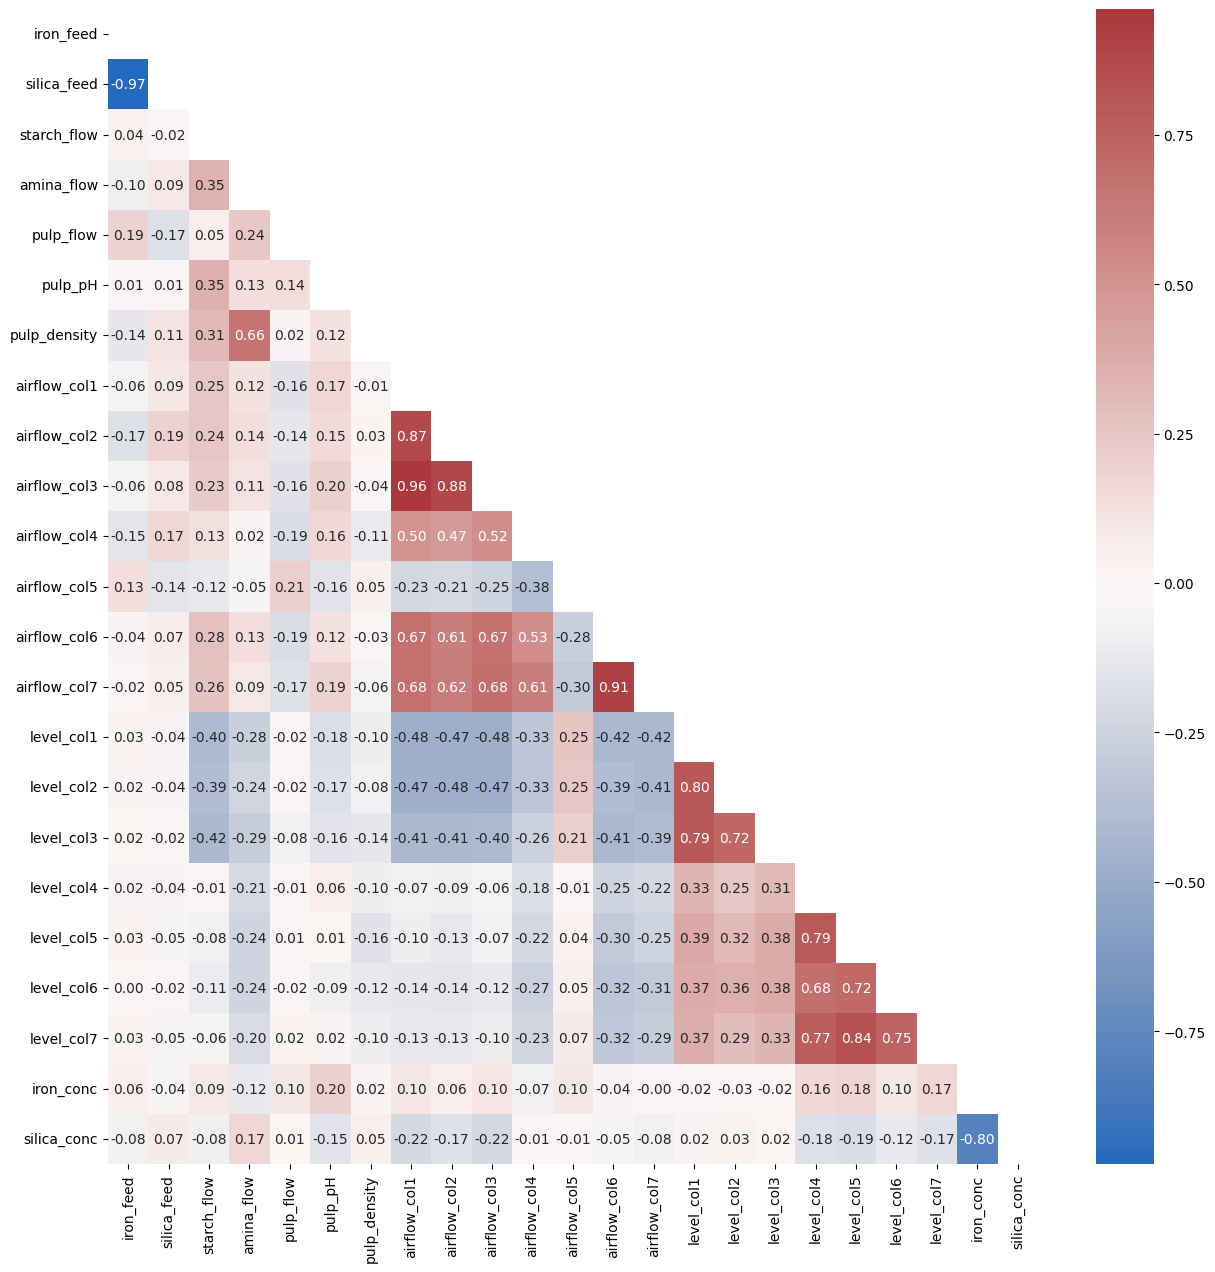

In [37]:
mask = np.triu(np.ones_like(flotation_grouped.corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(flotation_grouped.corr(), annot=True, fmt='.2f', cmap='vlag', 
            annot_kws={"fontsize": 10}, mask=mask)
plt.show()


In [61]:
correlation = flotation_grouped.corr().abs()
mask = correlation.mask(np.triu(np.ones(correlation.shape, dtype=bool)))
sorted_correlation = mask.unstack().sort_values(ascending=False)
sorted_correlation = sorted_correlation[(sorted_correlation > 0.60) & (sorted_correlation < 1.0)].reset_index()

# Rename the columns
sorted_correlation.columns = ['variable_1', 'variable_2', 'correlation_degree']

# Reorder the columns
sorted_correlation = sorted_correlation[['variable_1', 'variable_2', 'correlation_degree']]

# Print the resulting DataFrame
print(sorted_correlation)


      variable_1    variable_2  correlation_degree
0      iron_feed   silica_feed            0.971833
1   airflow_col1  airflow_col3            0.959986
2   airflow_col6  airflow_col7            0.910660
3   airflow_col2  airflow_col3            0.879139
4   airflow_col1  airflow_col2            0.866603
5     level_col5    level_col7            0.836013
6      iron_conc   silica_conc            0.801208
7     level_col1    level_col2            0.799347
8     level_col1    level_col3            0.794006
9     level_col4    level_col5            0.787783
10    level_col4    level_col7            0.772252
11    level_col6    level_col7            0.745318
12    level_col2    level_col3            0.723625
13    level_col5    level_col6            0.715788
14    level_col4    level_col6            0.683472
15  airflow_col3  airflow_col7            0.680850
16  airflow_col1  airflow_col7            0.678017
17  airflow_col1  airflow_col6            0.674750
18  airflow_col3  airflow_col6 

In [38]:
flotation_grouped.columns

Index(['iron_feed', 'silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow',
       'pulp_pH', 'pulp_density', 'airflow_col1', 'airflow_col2',
       'airflow_col3', 'airflow_col4', 'airflow_col5', 'airflow_col6',
       'airflow_col7', 'level_col1', 'level_col2', 'level_col3', 'level_col4',
       'level_col5', 'level_col6', 'level_col7', 'iron_conc', 'silica_conc'],
      dtype='object')

- iron_feed and silica_feed
- airflow_col1 and airflow_col2

###**4.7. Check & remove outliers**

- Visualize the variables for seeing outliers

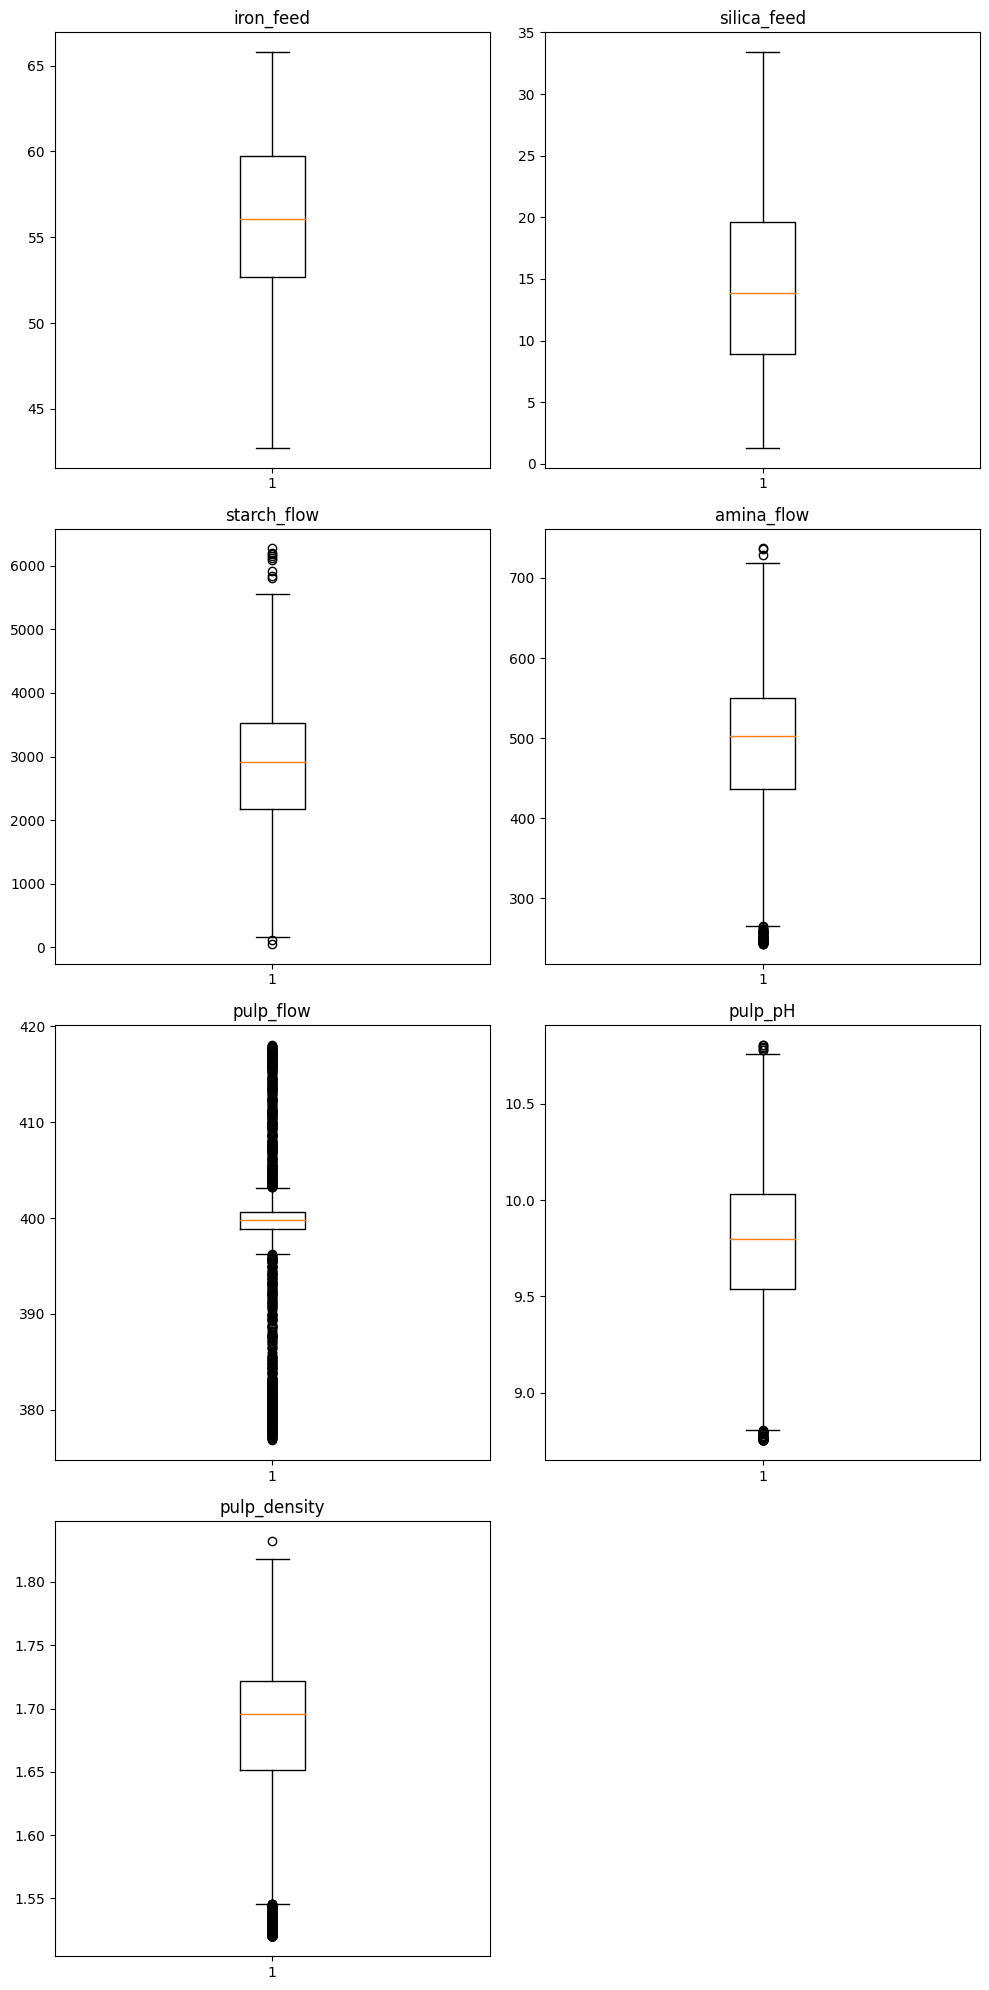

In [ ]:
variables = ["iron_feed", "silica_feed", "starch_flow", "amina_flow",
             "pulp_flow", "pulp_pH", "pulp_density"]

fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for i, variable in enumerate(variables):
    # Determine the subplot position
    row = i // 2
    col = i % 2

    # Select a specific variable for plotting
    data = flotation_grouped[variable]

    # Plotting the variable in the corresponding subplot
    axes[row, col].boxplot(data)
    axes[row, col].set_title(variable)

# Hide any empty subplots
if len(variables) < 8:
    for i in range(len(variables), 8):
        row = i // 2
        col = i % 2
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

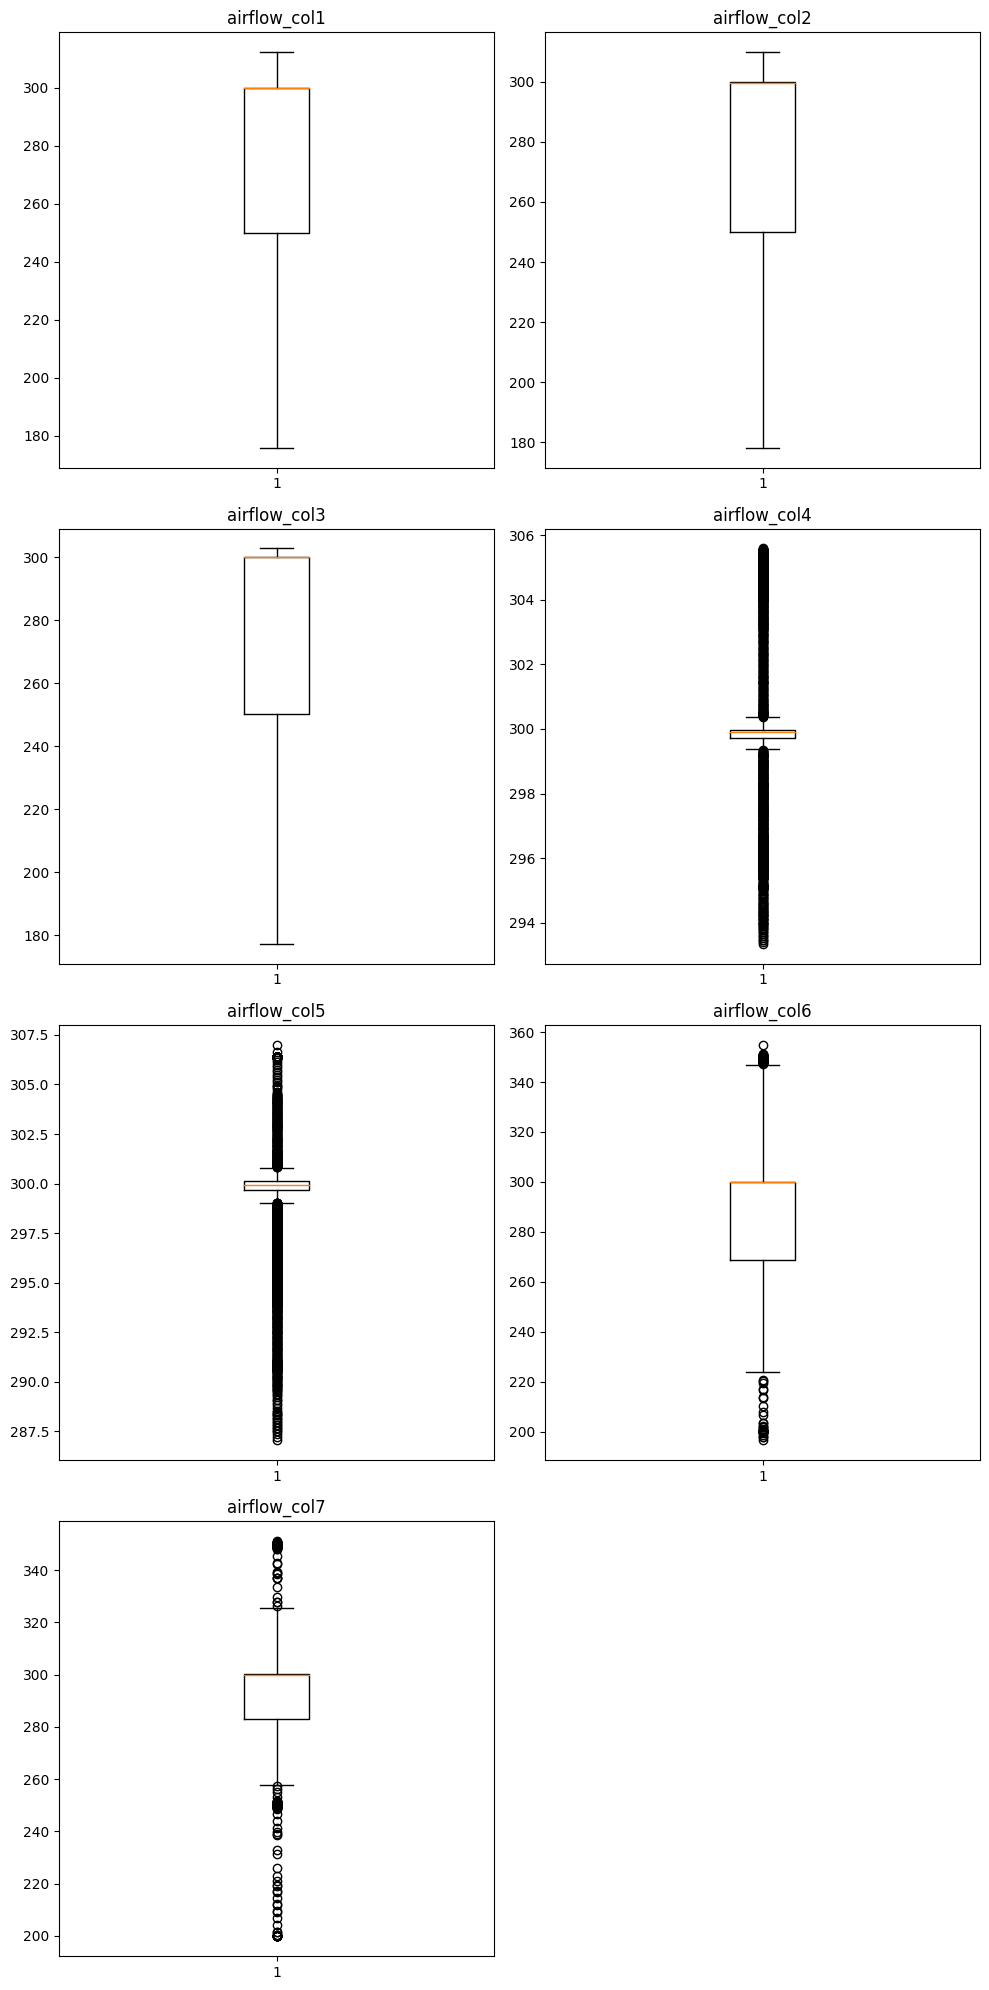

In [ ]:
variables = ["airflow_col1", "airflow_col2", "airflow_col3", "airflow_col4",
             "airflow_col5", "airflow_col6", "airflow_col7"]

fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for i, variable in enumerate(variables):
    # Determine the subplot position
    row = i // 2
    col = i % 2

    # Select a specific variable for plotting
    data = flotation_grouped[variable]

    # Plotting the variable in the corresponding subplot
    axes[row, col].boxplot(data)
    axes[row, col].set_title(variable)

# Hide any empty subplots
if len(variables) < 8:
    for i in range(len(variables), 8):
        row = i // 2
        col = i % 2
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

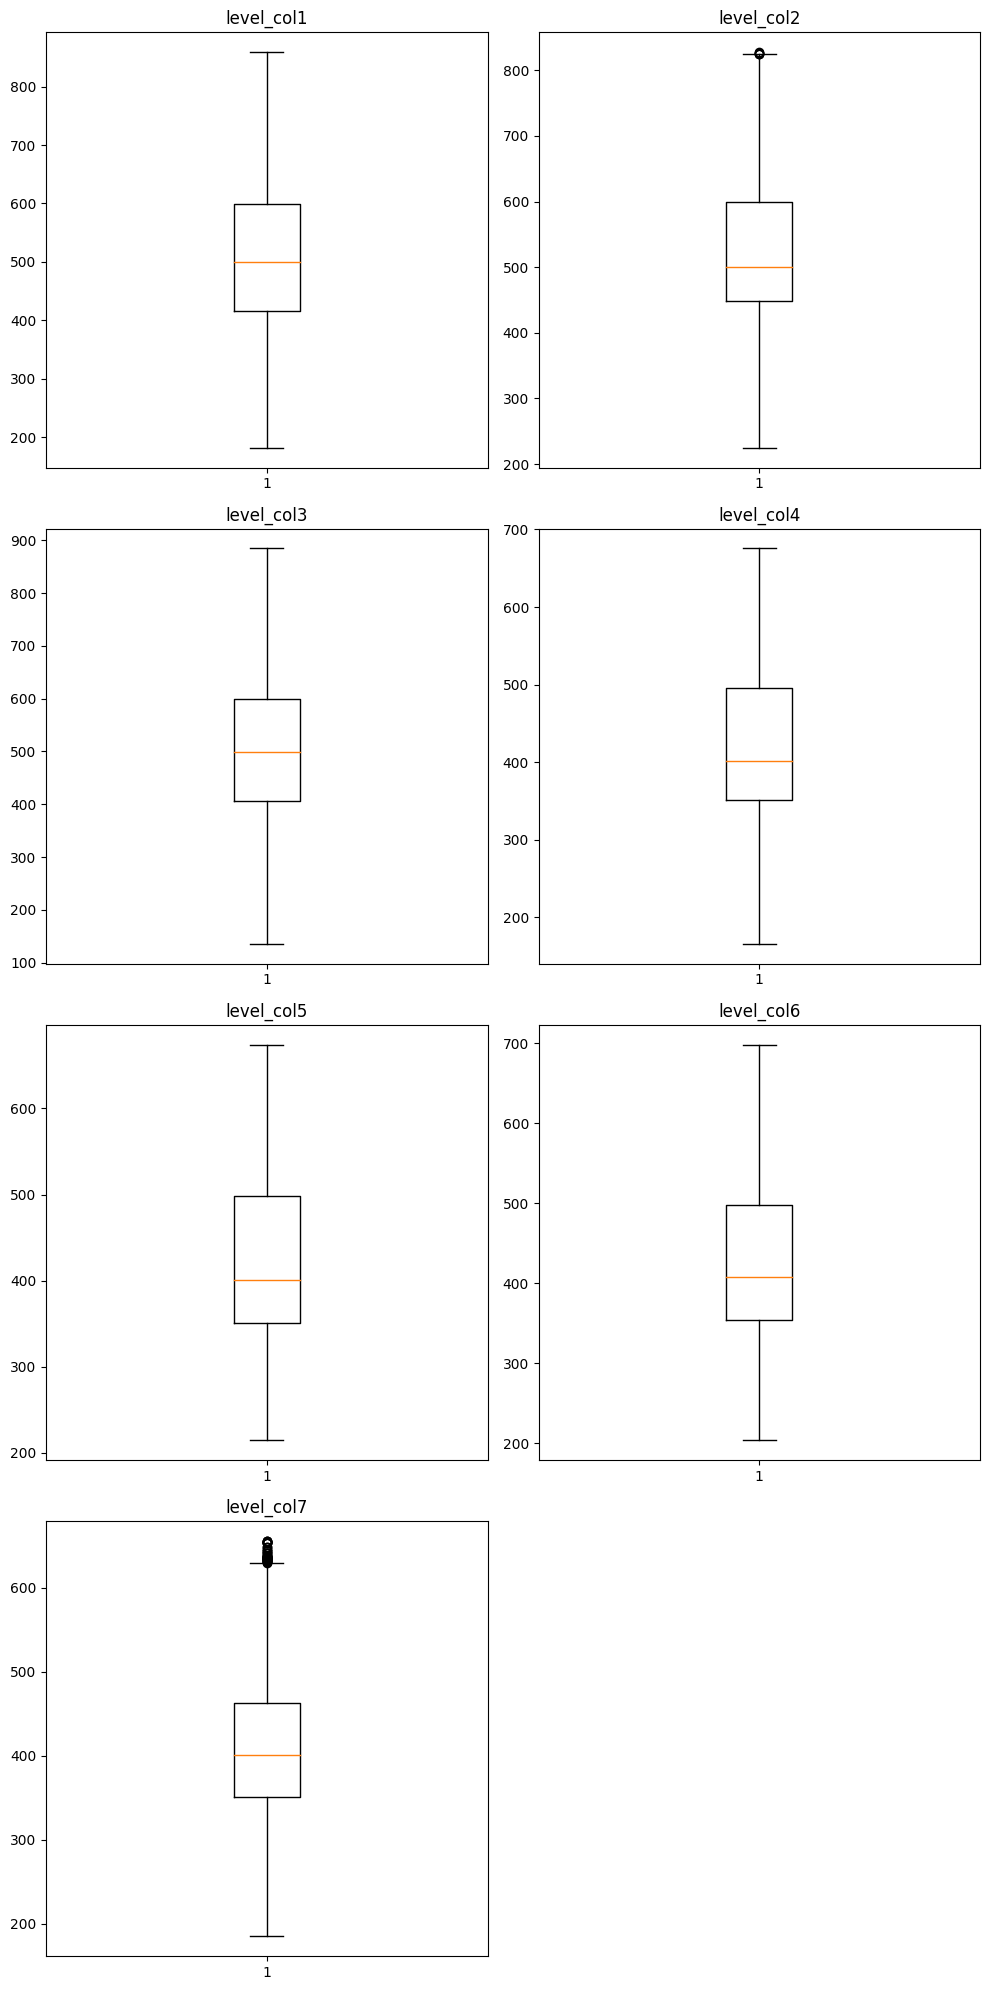

In [ ]:
variables = ["level_col1", "level_col2", "level_col3", "level_col4",
             "level_col5", "level_col6", "level_col7"]

fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for i, variable in enumerate(variables):
    # Determine the subplot position
    row = i // 2
    col = i % 2

    # Select a specific variable for plotting
    data = flotation_grouped[variable]

    # Plotting the variable in the corresponding subplot
    axes[row, col].boxplot(data)
    axes[row, col].set_title(variable)

# Hide any empty subplots
if len(variables) < 8:
    for i in range(len(variables), 8):
        row = i // 2
        col = i % 2
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

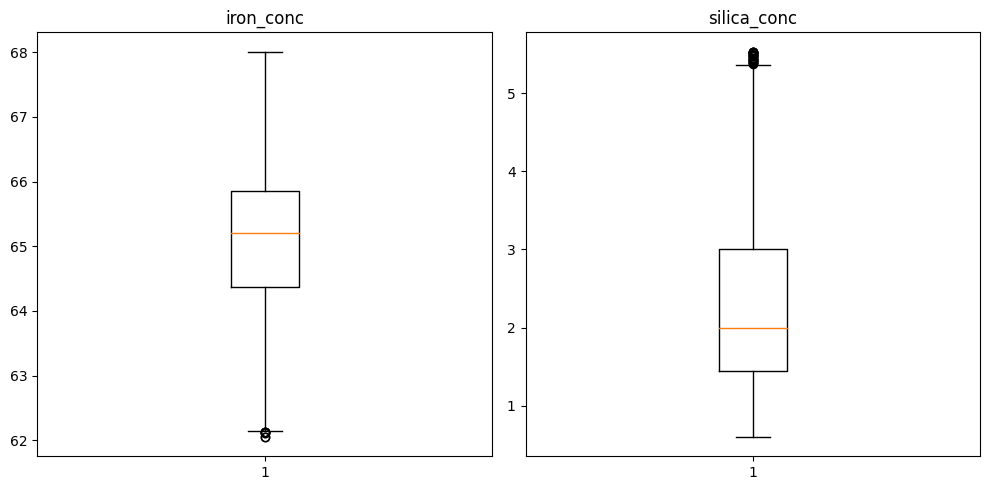

In [ ]:
variables = ["iron_conc", "silica_conc"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, variable in enumerate(variables):
    # Select a specific variable for plotting
    data = flotation_grouped[variable]

    # Plotting the variable in the corresponding subplot
    axes[i].boxplot(data)
    axes[i].set_title(variable)

plt.tight_layout()
plt.show()

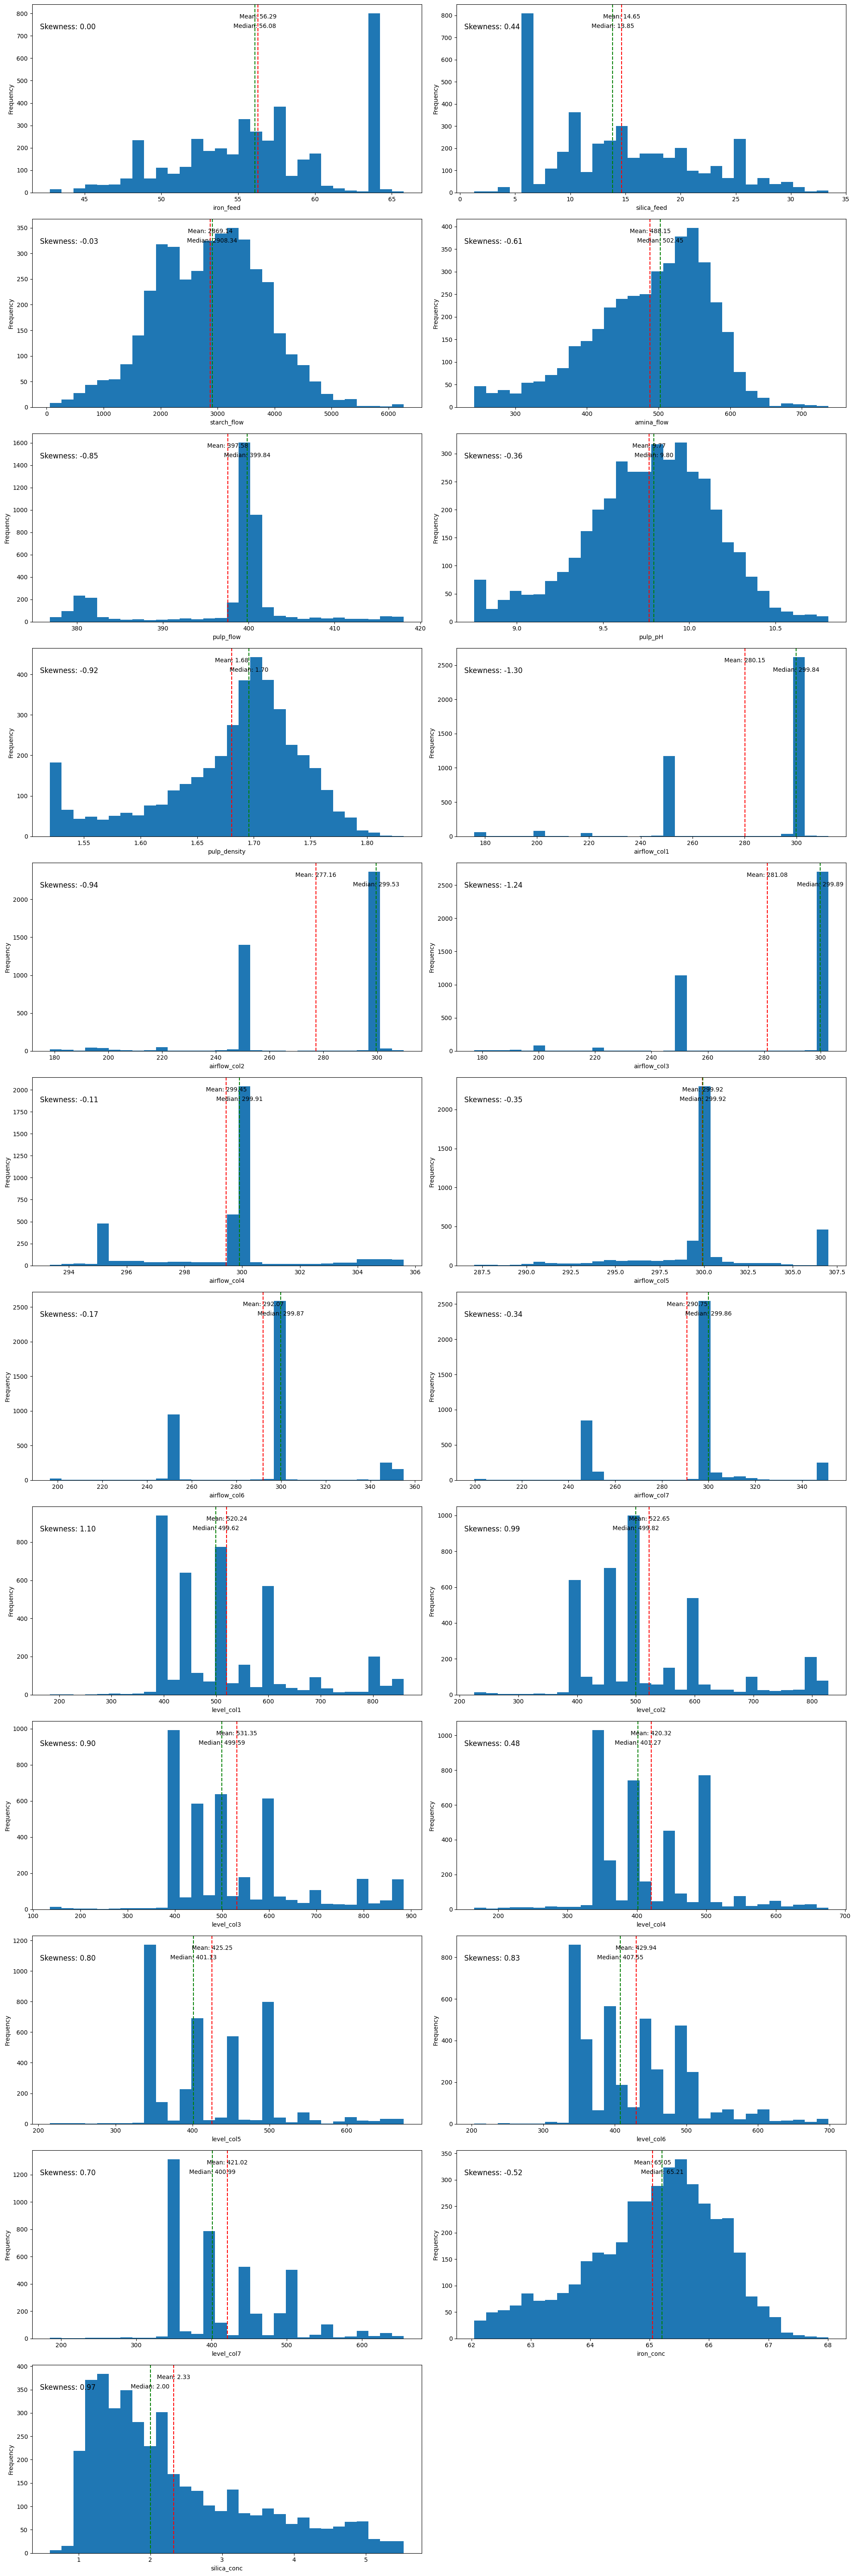

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

variables = ["iron_feed", "silica_feed", "starch_flow", "amina_flow",
             "pulp_flow", "pulp_pH", "pulp_density",
             "airflow_col1", "airflow_col2", "airflow_col3", "airflow_col4",
             "airflow_col5", "airflow_col6", "airflow_col7",
             "level_col1", "level_col2", "level_col3", "level_col4",
             "level_col5", "level_col6", "level_col7",
             "iron_conc", "silica_conc"]

num_vars = len(variables)
num_rows = (num_vars + 1) // 2  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, variable in enumerate(variables):
    # Select a specific column for skewness calculation
    data = flotation_grouped[variable].to_numpy()

    # Calculate the skewness degree
    skewness = skew(data)

    # Determine the subplot position
    row = i // 2
    col = i % 2

    # Plotting the variable in the corresponding subplot
    axes[row, col].hist(data, bins=30)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].axvline(np.mean(data), color='r', linestyle='--')
    axes[row, col].axvline(np.median(data), color='g', linestyle='--')

    # Display the skewness degree in the plot frame
    axes[row, col].text(0.02, 0.9, f"Skewness: {skewness:.2f}",
                        transform=axes[row, col].transAxes, fontsize=12, verticalalignment='top')

    # Display the mean and median values near the lines
    ylim = axes[row, col].get_ylim()
    y_range = ylim[1] - ylim[0]
    axes[row, col].text(np.mean(data), ylim[1] - 0.05 * y_range,
                        f"Mean: {np.mean(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    axes[row, col].text(np.median(data), ylim[1] - 0.1 * y_range,
                        f"Median: {np.median(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')

# Hide empty subplots
if num_vars % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout()
plt.show()
